<a href="https://www.kaggle.com/code/anjusukumaran4/data-analysis-using-pivot-tables?scriptVersionId=136205238" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 ## Titanic - Machine Learning from Disaster - Analysing Data with **Pivot Tables**
 Pivot tables allow anyone to filter and extract significance about the data set they are working with and  to look at their data in a number of ways and perspectives. Pandas library offers a function called **pivot_table** that summarized a feature’s values in a neat two-dimensional table.

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=12,6
plt.style.use('ggplot')

In [2]:
#read data
df=pd.read_csv('../input/titanic/train.csv')

In [3]:
#first five values
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#droping insignificant features
df.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)

In [5]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C


## Building Pivot Table

### Grouping data using index in a pivot table

In [6]:
#single index
#using 'Sex' columns as index

table1=pd.pivot_table(data=df,index=['Sex'])
table1

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.915709,44.479818,0.649682,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,2.389948,0.429809,0.188908


the value in each cell is the mean value of respective category.

<AxesSubplot:xlabel='Sex'>

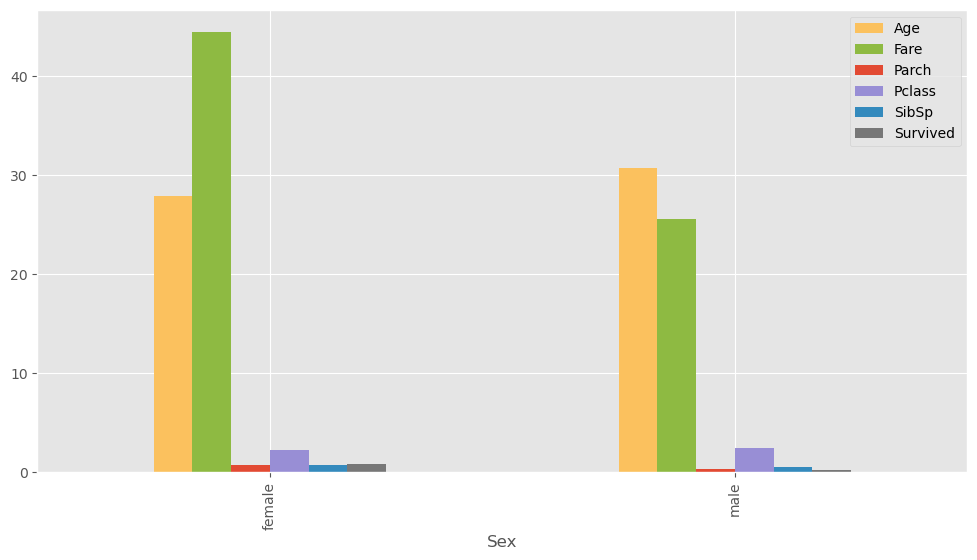

In [7]:
#visualization
table1.plot(kind='bar',color=['C4','C5','C7','C2','C8','C10'])

In [8]:
#multiple index that is, use more than one feature as an index to group data

table2=pd.pivot_table(df,index=['Sex','Pclass'])
table2

Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       34.611765  106.125798  0.457447  0.553191  0.968085
       2       28.722973   21.970121  0.605263  0.486842  0.921053
       3       21.750000   16.118810  0.798611  0.895833  0.500000
male   1       41.281386   67.226127  0.278689  0.311475  0.368852
       2       30.740707   19.741782  0.222222  0.342593  0.157407
       3       26.507589   12.661633  0.224784  0.498559  0.135447

### Different aggregation function for different features

In [9]:
#using aggregate functionS

table3=pd.pivot_table(df,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})
table3

Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47

### Aggregate on specific features with values parmeter

In [10]:
#value parameter is where you tell the function which features to aggregate on

table4=pd.pivot_table(df,index=['Sex','Pclass'],values=['Survived'],aggfunc=np.mean)
table4

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

<AxesSubplot:xlabel='Sex,Pclass'>

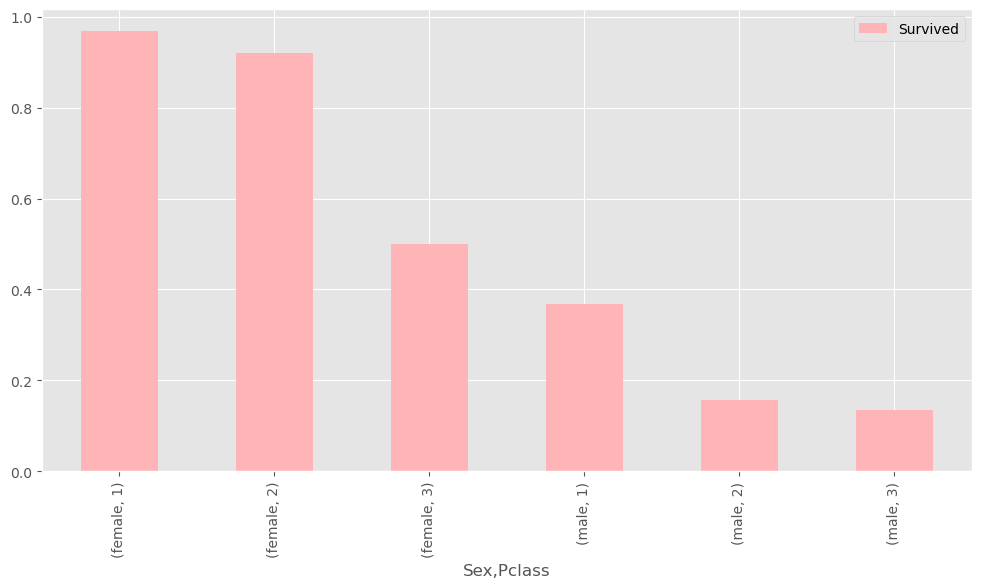

In [11]:
#visualization
table4.plot(kind='bar',color='C6')

### Find the relationship between features with columns parameter

In [12]:
#columns parameter displays the values horizontally on the top of the resultand table

table5=pd.pivot_table(df,index=['Sex'],columns=["Pclass"],values=["Survived"],aggfunc=np.sum)
table5

Survived        
Pclass        1   2   3
Sex                    
female       91  70  72
male         45  17  47

<AxesSubplot:xlabel='Sex'>

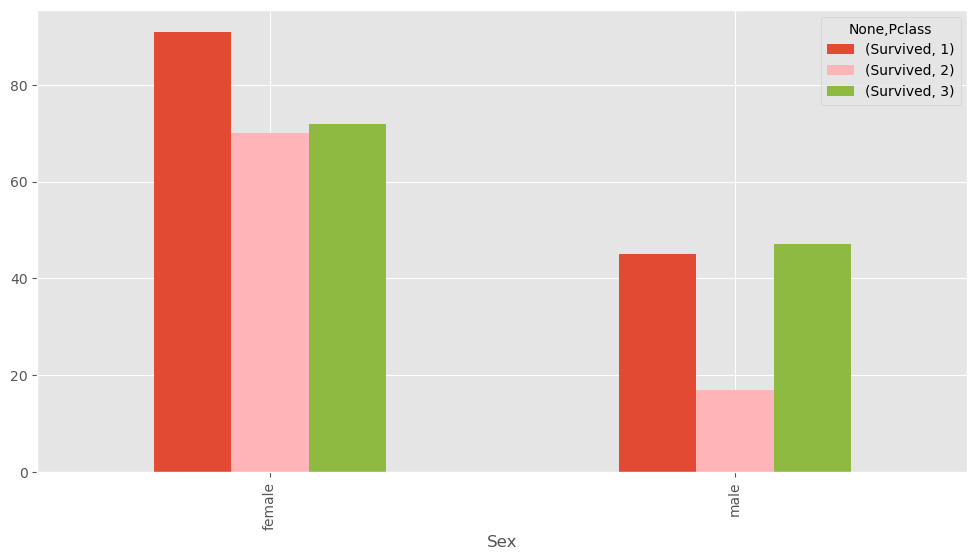

In [13]:
#visualization
table5.plot(kind='bar',color=['C7', 'C6', 'C5'])

### Handling missing data

In [14]:
#display null values

table6=pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=["Embarked"],values=['Age'],aggfunc=np.mean)
table6

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000        NaN  13.500000
                2             NaN        NaN  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500        NaN  36.121667
                2        1.000000        NaN  17.095000
                3       18.488571  29.000000  22.933333

In [15]:
#replacing NaN values with mean value from 'Age' column

table7=pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=["Embarked"],values=['Age'],aggfunc=np.mean,fill_value=np.mean(df['Age']))
table7

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000  29.699118  13.500000
                2       29.699118  29.699118  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500  29.699118  36.121667
                2        1.000000  29.699118  17.095000
                3       18.488571  29.000000  22.933333